In [2]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import matplotlib.animation as animation


In [3]:
url_inicio="https://footballapi.pulselive.com/football/standings?compSeasons=489&altIds=true&detail=2&FOOTBALL_COMPETITION=1&gameweekNumbers=1-"
url_final="&live=true"

In [4]:
urls=[]
for fechas in range(1,37):
    urls.append(url_inicio+str(fechas)+url_final)

In [5]:
len(urls)

36

In [6]:
urls

['https://footballapi.pulselive.com/football/standings?compSeasons=489&altIds=true&detail=2&FOOTBALL_COMPETITION=1&gameweekNumbers=1-1&live=true',
 'https://footballapi.pulselive.com/football/standings?compSeasons=489&altIds=true&detail=2&FOOTBALL_COMPETITION=1&gameweekNumbers=1-2&live=true',
 'https://footballapi.pulselive.com/football/standings?compSeasons=489&altIds=true&detail=2&FOOTBALL_COMPETITION=1&gameweekNumbers=1-3&live=true',
 'https://footballapi.pulselive.com/football/standings?compSeasons=489&altIds=true&detail=2&FOOTBALL_COMPETITION=1&gameweekNumbers=1-4&live=true',
 'https://footballapi.pulselive.com/football/standings?compSeasons=489&altIds=true&detail=2&FOOTBALL_COMPETITION=1&gameweekNumbers=1-5&live=true',
 'https://footballapi.pulselive.com/football/standings?compSeasons=489&altIds=true&detail=2&FOOTBALL_COMPETITION=1&gameweekNumbers=1-6&live=true',
 'https://footballapi.pulselive.com/football/standings?compSeasons=489&altIds=true&detail=2&FOOTBALL_COMPETITION=1&gam

In [7]:
headers = {
    'Origin': 'https://www.premierleague.com',
    'Referer': 'https://www.premierleague.com',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'


}


In [8]:
gameweek=[]
team=[]
position=[]
for index,url in enumerate(urls):
    response = requests.get(url, headers=headers)
    data = response.json()
    for i in range(0,20):
        team_name=team.append(data["tables"][0]["entries"][i]["team"]["name"])
        team_position=position.append(data["tables"][0]["entries"][i]["position"])
        fechas=gameweek.append(data["tables"][0]["entries"][i]["form"][0]["gameweek"]["gameweek"])
        team.append(team_name)
        position.append(team_position)
        gameweek.append(fechas)

In [9]:
df=pd.DataFrame({"team":team,"position":position,"gameweek":gameweek})
#Eliminar nan
df=df.dropna()
#Dejar solo Manchester City y Arsenal
df=df[(df["team"]=="Manchester City") | (df["team"]=="Arsenal")]
df=df.reset_index(drop=True)
df

,team,position,gameweek
0,Arsenal,3.0,1.0
1,Manchester City,4.0,1.0
2,Manchester City,1.0,1.0
3,Arsenal,2.0,1.0
4,Arsenal,1.0,1.0
...,...,...,...
67,Arsenal,2.0,30.0
68,Manchester City,1.0,31.0
69,Arsenal,2.0,31.0
70,Manchester City,1.0,33.0


In [10]:
36*20

720

In [11]:
df["gameweek"].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  8.,  9., 10., 11., 13., 14., 15.,
       16., 17., 18., 19., 20., 21., 23., 22., 24., 25., 26., 27., 28.,
       29., 30., 31., 33., 32.])

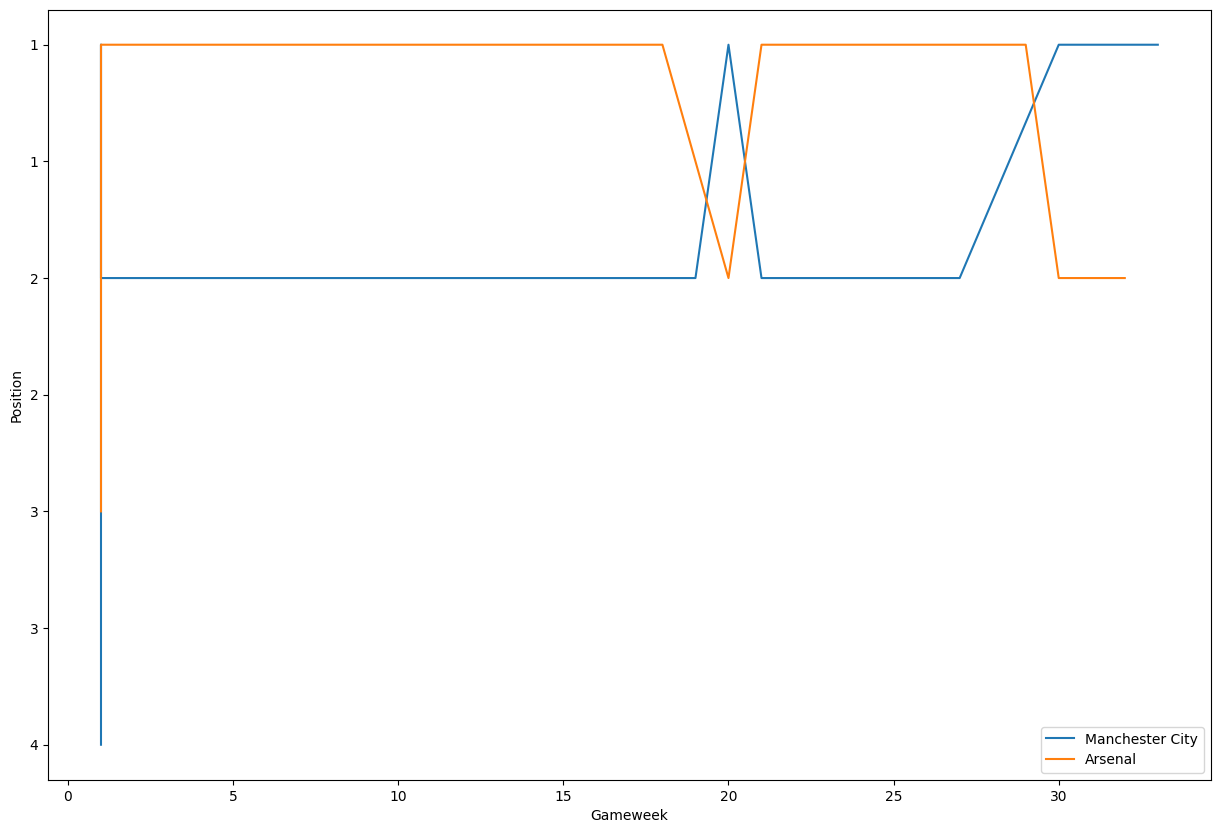

In [12]:
#Gráfica de líneas 


fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(df[df["team"]=="Manchester City"]["gameweek"],df[df["team"]=="Manchester City"]["position"],label="Manchester City")
ax.plot(df[df["team"]=="Arsenal"]["gameweek"],df[df["team"]=="Arsenal"]["position"],label="Arsenal")
ax.set_xlabel("Gameweek")
ax.set_ylabel("Position")
#Eje y invertido
ax.invert_yaxis()
ax.legend()
#Eje y con enteros
import matplotlib.ticker as mtick
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))

In [13]:
# Set the backend explicitly
plt.switch_backend('TkAgg')

# Assuming your DataFrame is named 'df'
# Sort the DataFrame by gameweek for proper animation
df = df.sort_values('gameweek')

# Create a figure and axis for the graph
fig, ax = plt.subplots()

# Define a function to update the graph at each frame of the animation
def update(frame):
    # Filter the DataFrame for the current gameweek
    data = df[df['gameweek'] <= frame]

    # Group the data by team and calculate the average position
    avg_positions = data.groupby('team')['position'].mean().sort_values()

    # Clear the current axis
    ax.clear()

    # Plot the positions of teams
    ax.plot(avg_positions.values, 'o-')

    # Set labels and title
    ax.set_xlabel('Team')
    ax.set_ylabel('Position')
    ax.set_title(f'Gameweek {int(frame)}')

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45)

# Set the range of gameweeks for the animation
gameweek_range = range(int(df['gameweek'].min()), int(df['gameweek'].max()) + 1)

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=gameweek_range, interval=1000)

# Display the animation
plt.show()

: 